In [1]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
def load_dataset(filename):
    file = open(filename,"r")
    lines = csv.reader(file,delimiter=',')
    dataset = list(lines)
    return dataset


In [67]:
def col_conversion(dataset):
    for row in dataset:
        l1 = len(dataset[0])
        for i in range(0, l1):
            tmp = row[i]
            if tmp.isnumeric():
                row[i] = int(row[i].strip())
            else:                
                try:
                    row[i] = float(row[i]) 
                except:    
                    pass
    return dataset

In [68]:
def normalize(train):
     return  StandardScaler().fit_transform(train)

In [69]:
def split_validation(dataset,split):
    train = list()
    ld = len(dataset)
    train_size = split*ld
    validate_set = list(dataset)
    while True:
        if len(train) >= train_size:
            break
        index = randrange(len(validate_set))
        train.append(validate_set.pop(index))
    return train,validate_set 

## RNN

In [30]:
data = pd.read_csv('dt.csv')
data = data.sort_values(by='date')

In [63]:
modified_dataset = data
high_prices = np.array(data['high'])
low_prices = np.array(data['low'])
avg_prices = np.mean([high_prices, low_prices], axis=0)
modified_dataset['Avg_Price'] = avg_prices
train_set, test_set = train_test_split(data, shuffle=False)

In [70]:
sc = MinMaxScaler(feature_range = (0, 1))
feature_vec_scaled = sc.fit_transform(train_set.iloc[:, -2:].values)
sc_target = MinMaxScaler(feature_range = (0, 1))
feature_vec_target = sc_target.fit_transform(train_set.iloc[:, 1:2].values)

In [ ]:
def hid_layers_model(numhidden_layers, feature_vec_scaled, feature_vec_target, hid_layer_size, time_steps):
    X_train = []
    y_train = []
    l1 = len(train_set)
    tt = time_steps
    i = time_steps
    while(i<l1):
        X_train.append(feature_vec_scaled[i-time_steps:i])
        y_train.append(feature_vec_target[i])
        i = i + 1
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    sh1 = X_train.shape[0]
    sh2 = X_train.shape[1]*2
    X_train = np.reshape(X_train, (sh1, sh2, 1))
    
    regressor = Sequential()
    regressor.add(LSTM(units = hid_layer_size, return_sequences = True, input_shape = (X_train.shape[1], 1)))   
    if(numhidden_layers == 3):
        regressor.add(LSTM(units = hid_layer_size, return_sequences = True))
    regressor.add(LSTM(units = hid_layer_size))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
    
    
    dataset_total = modified_dataset.iloc[:, -2:]
    ld = len(dataset_total)
    lt = len(test_set)
    inputs = dataset_total[ld - lt - time_steps:].values
    inputs = inputs.reshape(-1,2)
    inputs = sc.transform(inputs)
    X_test = []
    
    l22 = time_steps
    l22b = len(test_set)+time_steps
    for i in range(l22, l22b):
        X_test.append(inputs[i-time_steps:i])
    X_test = np.array(X_test)
    
    ls1 = X_test.shape[0]
    ls2 = X_test.shape[1]*2
    X_test = np.reshape(X_test, (ls1, ls2, 1))
    predicted_stock_price = regressor.predict(X_test)
    predicted_stock_price = sc_target.inverse_transform(predicted_stock_price)

### For 2 Hidden Layers

Epoch 1/100
546/546 [==============================] - 4s 8ms/sample - loss: 0.1370
Epoch 2/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0154
Epoch 3/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0058
Epoch 4/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0032
Epoch 5/100
546/546 [==============================] - 1s 3ms/sample - loss: 0.0021
Epoch 6/100
546/546 [==============================] - 1s 3ms/sample - loss: 0.0023
Epoch 7/100
546/546 [==============================] - 1s 3ms/sample - loss: 0.0019
Epoch 8/100
546/546 [==============================] - 1s 3ms/sample - loss: 0.0019
Epoch 9/100
546/546 [==============================] - 1s 3ms/sample - loss: 0.0019
Epoch 10/100
546/546 [==============================] - 1s 3ms/sample - loss: 0.0018
Epoch 11/100
546/546 [==============================] - 1s 3ms/sample - loss: 0.0018
Epoch 12/100
546/546 [==============================] - 1s 3ms/sample - lo

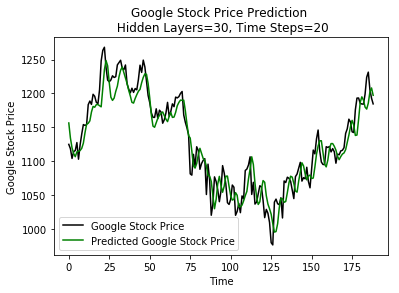

Epoch 1/100
546/546 [==============================] - 5s 10ms/sample - loss: 0.0867
Epoch 2/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0095
Epoch 3/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0034
Epoch 4/100
546/546 [==============================] - 1s 3ms/sample - loss: 0.0020
Epoch 5/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0020
Epoch 6/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0018
Epoch 7/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0019
Epoch 8/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0018
Epoch 9/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0021
Epoch 10/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0019
Epoch 11/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0017
Epoch 12/100
546/546 [==============================] - 2s 3ms/sample - l

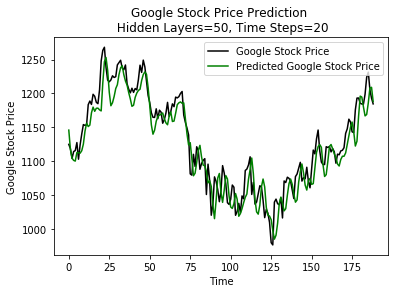

Epoch 1/100
546/546 [==============================] - 5s 9ms/sample - loss: 0.0547
Epoch 2/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0061
Epoch 3/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0024
Epoch 4/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0018
Epoch 5/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0017
Epoch 6/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0017
Epoch 7/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0017
Epoch 8/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0016
Epoch 9/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0017
Epoch 10/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0016
Epoch 11/100
546/546 [==============================] - 2s 3ms/sample - loss: 0.0016
Epoch 12/100
546/546 [==============================] - 2s 3ms/sample - lo

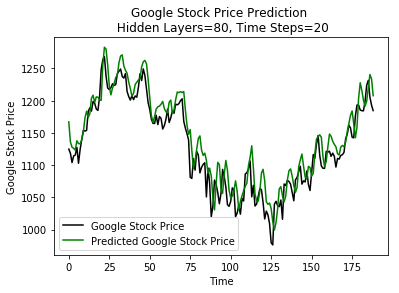

Epoch 1/100
516/516 [==============================] - 7s 14ms/sample - loss: 0.1679
Epoch 2/100
516/516 [==============================] - 4s 7ms/sample - loss: 0.0176
Epoch 3/100
516/516 [==============================] - 4s 7ms/sample - loss: 0.0068
Epoch 4/100
516/516 [==============================] - 4s 7ms/sample - loss: 0.0032
Epoch 5/100
516/516 [==============================] - 4s 7ms/sample - loss: 0.0022
Epoch 6/100
516/516 [==============================] - 4s 8ms/sample - loss: 0.0021
Epoch 7/100
516/516 [==============================] - 4s 7ms/sample - loss: 0.0022
Epoch 8/100
516/516 [==============================] - 4s 7ms/sample - loss: 0.0021
Epoch 9/100
516/516 [==============================] - 4s 7ms/sample - loss: 0.0023
Epoch 10/100
516/516 [==============================] - 4s 7ms/sample - loss: 0.0024
Epoch 11/100
516/516 [==============================] - 4s 7ms/sample - loss: 0.0021
Epoch 12/100
516/516 [==============================] - 4s 7ms/sample - l

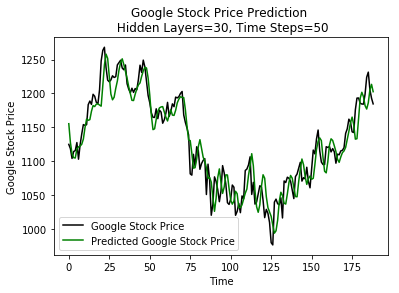

Epoch 1/100
516/516 [==============================] - 11s 21ms/sample - loss: 0.1174
Epoch 2/100
516/516 [==============================] - 5s 10ms/sample - loss: 0.0112
Epoch 3/100
516/516 [==============================] - 5s 10ms/sample - loss: 0.0050
Epoch 4/100
516/516 [==============================] - 5s 10ms/sample - loss: 0.0024
Epoch 5/100
516/516 [==============================] - 5s 9ms/sample - loss: 0.0019
Epoch 6/100
516/516 [==============================] - 5s 10ms/sample - loss: 0.0019
Epoch 7/100
516/516 [==============================] - 5s 9ms/sample - loss: 0.0019
Epoch 8/100
516/516 [==============================] - 5s 10ms/sample - loss: 0.0023
Epoch 9/100
516/516 [==============================] - 5s 10ms/sample - loss: 0.0021
Epoch 10/100
516/516 [==============================] - 5s 10ms/sample - loss: 0.0021
Epoch 11/100
516/516 [==============================] - 4s 9ms/sample - loss: 0.0022
Epoch 12/100
516/516 [==============================] - 5s 10ms/s

KeyboardInterrupt: 

In [48]:
time_step_list = [20, 50, 75]
hidden_layers_list = [30, 50, 80]
for i in range(0,len(time_step_list)):
    time_step=time_step_list[i]
    for j in range(0,len(hidden_layers_list)):
        hidden_layers=hidden_layers_list[j]
        hid_layers_model(2, feature_vec_scaled, feature_vec_target, hidden_layers, time_step)

### For 3 Hidden Layers

Hidden Layer Size = 30
Time Steps = 20
Epoch 1/100
546/546 [==============================] - 5s 9ms/step - loss: 0.1377
Epoch 2/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0322
Epoch 3/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0182
Epoch 4/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0122
Epoch 5/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0111
Epoch 6/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0106
Epoch 7/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 8/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0149
Epoch 9/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0104
Epoch 10/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0099
Epoch 11/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0091
Epoch 12/100
546/546 [==============================] - 1

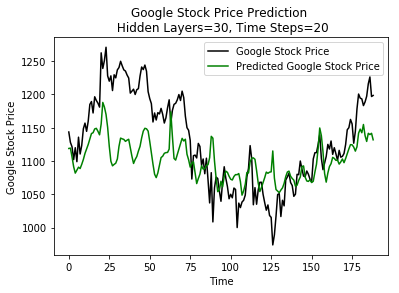

Hidden Layer Size = 50
Time Steps = 20
Epoch 1/100
546/546 [==============================] - 5s 10ms/step - loss: 0.1077
Epoch 2/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0265
Epoch 3/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0130
Epoch 4/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0109
Epoch 5/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0108
Epoch 6/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0101
Epoch 7/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0097
Epoch 8/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0093
Epoch 9/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 10/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0089
Epoch 11/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0089
Epoch 12/100
546/546 [==============================] - 

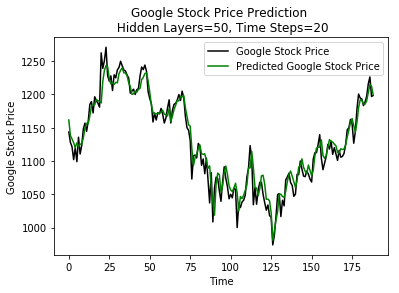

Hidden Layer Size = 80
Time Steps = 20
Epoch 1/100
546/546 [==============================] - 6s 10ms/step - loss: 0.0724
Epoch 2/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0171
Epoch 3/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0109
Epoch 4/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0110
Epoch 5/100
546/546 [==============================] - 1s 1ms/step - loss: 0.0101
Epoch 6/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0105
Epoch 7/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0122
Epoch 8/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0094
Epoch 9/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0102
Epoch 10/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0100
Epoch 11/100
546/546 [==============================] - 1s 2ms/step - loss: 0.0094
Epoch 12/100
546/546 [==============================] - 

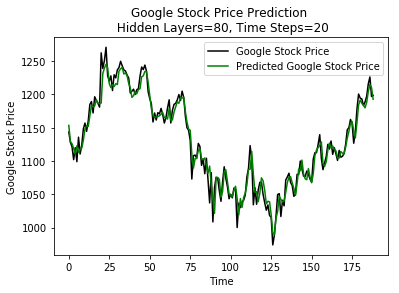

Hidden Layer Size = 30
Time Steps = 50
Epoch 1/100
516/516 [==============================] - 7s 13ms/step - loss: 0.1107
Epoch 2/100
516/516 [==============================] - 2s 3ms/step - loss: 0.0303
Epoch 3/100
516/516 [==============================] - 2s 3ms/step - loss: 0.0194
Epoch 4/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0107
Epoch 5/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0091
Epoch 6/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0089
Epoch 7/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0087
Epoch 8/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0086
Epoch 9/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0084
Epoch 10/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0086
Epoch 11/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0092
Epoch 12/100
516/516 [==============================] - 

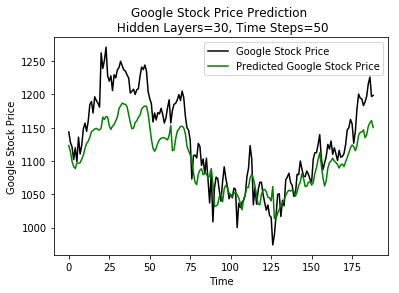

Hidden Layer Size = 50
Time Steps = 50
Epoch 1/100
516/516 [==============================] - 7s 14ms/step - loss: 0.1137
Epoch 2/100
516/516 [==============================] - 2s 3ms/step - loss: 0.0221
Epoch 3/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0131
Epoch 4/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0108
Epoch 5/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0106
Epoch 6/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0113
Epoch 7/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0093
Epoch 8/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0087
Epoch 9/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0095
Epoch 10/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0087
Epoch 11/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0084
Epoch 12/100
516/516 [==============================] - 

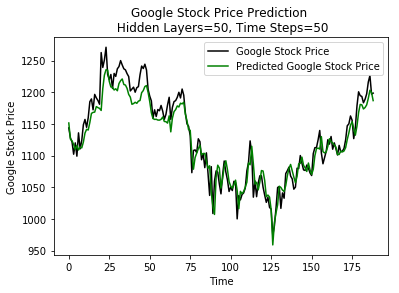

Hidden Layer Size = 80
Time Steps = 50
Epoch 1/100
516/516 [==============================] - 7s 14ms/step - loss: 0.0877
Epoch 2/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0206
Epoch 3/100
516/516 [==============================] - 2s 4ms/step - loss: 0.0111
Epoch 4/100
516/516 [==============================] - 2s 5ms/step - loss: 0.0094
Epoch 5/100
516/516 [==============================] - 2s 5ms/step - loss: 0.0095
Epoch 6/100
516/516 [==============================] - 2s 5ms/step - loss: 0.0094
Epoch 7/100
516/516 [==============================] - 2s 5ms/step - loss: 0.0085
Epoch 8/100
516/516 [==============================] - 2s 5ms/step - loss: 0.0095
Epoch 9/100
516/516 [==============================] - 2s 5ms/step - loss: 0.0086
Epoch 10/100
516/516 [==============================] - 2s 5ms/step - loss: 0.0095
Epoch 11/100
516/516 [==============================] - 2s 5ms/step - loss: 0.0086
Epoch 12/100
516/516 [==============================] - 

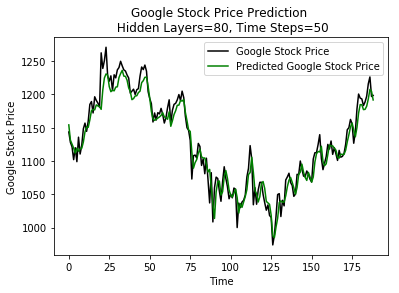

Hidden Layer Size = 30
Time Steps = 75
Epoch 1/100
491/491 [==============================] - 8s 16ms/step - loss: 0.1505
Epoch 2/100
491/491 [==============================] - 2s 5ms/step - loss: 0.0362
Epoch 3/100
491/491 [==============================] - 3s 6ms/step - loss: 0.0200
Epoch 4/100
491/491 [==============================] - 3s 6ms/step - loss: 0.0127
Epoch 5/100
491/491 [==============================] - 3s 6ms/step - loss: 0.0096
Epoch 6/100
491/491 [==============================] - 3s 6ms/step - loss: 0.0098
Epoch 7/100
491/491 [==============================] - 3s 6ms/step - loss: 0.0101
Epoch 8/100
491/491 [==============================] - 3s 6ms/step - loss: 0.0088
Epoch 9/100
491/491 [==============================] - 3s 6ms/step - loss: 0.0086
Epoch 10/100
491/491 [==============================] - 3s 6ms/step - loss: 0.0090
Epoch 11/100
491/491 [==============================] - 3s 6ms/step - loss: 0.0085
Epoch 12/100
491/491 [==============================] - 

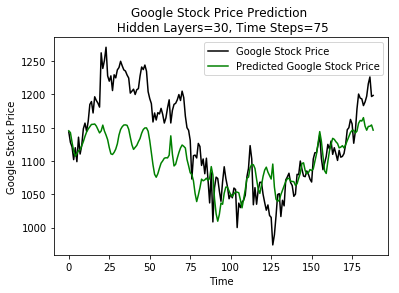

Hidden Layer Size = 50
Time Steps = 75
Epoch 1/100
491/491 [==============================] - 14s 29ms/step - loss: 0.0926
Epoch 2/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0274
Epoch 3/100
491/491 [==============================] - 6s 11ms/step - loss: 0.0154
Epoch 4/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0115
Epoch 5/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0110
Epoch 6/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0097
Epoch 7/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0088
Epoch 8/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0092
Epoch 9/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0090
Epoch 10/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0093
Epoch 11/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0085
Epoch 12/100
491/491 [=======================

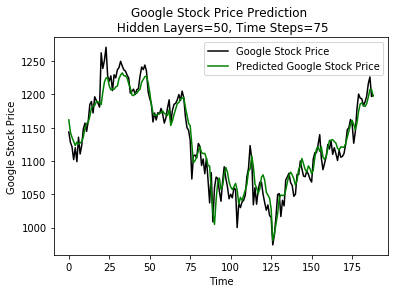

Hidden Layer Size = 80
Time Steps = 75
Epoch 1/100
491/491 [==============================] - 16s 33ms/step - loss: 0.0864
Epoch 2/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0187
Epoch 3/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0112
Epoch 4/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0098
Epoch 5/100
491/491 [==============================] - 6s 11ms/step - loss: 0.0092
Epoch 6/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0091
Epoch 7/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0084
Epoch 8/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0085
Epoch 9/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0083
Epoch 10/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0082
Epoch 11/100
491/491 [==============================] - 5s 11ms/step - loss: 0.0085
Epoch 12/100
491/491 [=======================

491/491 [==============================] - 6s 12ms/step - loss: 9.4783e-04
Epoch 99/100
491/491 [==============================] - 6s 11ms/step - loss: 9.6246e-04
Epoch 100/100
491/491 [==============================] - 7s 14ms/step - loss: 8.5321e-04


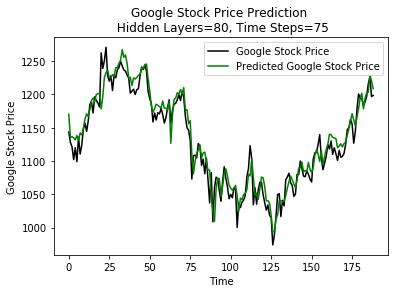

In [36]:
time_step_list = [20, 50, 75]
hidden_layers_list = [30, 50, 80]
for i in range(0,len(time_step_list)):
    time_step=time_step_list[i]
    for j in range(0,len(hidden_layers_list)):
        hidden_layers=hidden_layers_list[j]
        hid_layers_model(3, feature_vec_scaled, feature_vec_target, hidden_layers, time_step)

## Question 2

In [2]:
import math

def compute_prob(dna_seq,path_seq):
    path_type = {"E": 0, "5": 1, "I": 2}
    dna_type = {"A": 0, "C": 1, "G": 2, "T": 3}
    
    # Compute transition matrix probability
    transition_mat = [[0.9, 0.1, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 0.9]]
    # Compute emission matrix 
    emission_mat = [[0.25, 0.25, 0.25, 0.25], [0.05, 0.0, 0.95, 0.0], [0.4, 0.1, 0.1, 0.4]]
    
    prob = 1
    
    for i in range(len(dna_seq)):
        if i==0:
            if path_seq[i] == 'E':
                prob = 1.0
            else:
                prob = 0.0
            prob= prob*emission_mat[path_type[path_seq[i]]][dna_type[dna_seq[i]]] 
        else:
            prev = path_seq[i-1]
            new = path_seq[i]
            dna = dna_seq[i]
            prob *= transition_mat[path_type[prev]][path_type[new]]
            prob *= emission_mat[path_type[new]][dna_type[dna]]
    
    if len(dna_seq) == len(path_seq) - 1:
        if path_seq[len(path_seq) - 2] == 'I':
            prob *= 0.1
        else :
            prob = 0.0
    print(math.log(prob))

In [3]:
compute_prob("CTTCATGTGAAAGCAGACGTAAGTCA", "EEEEEEEEEEEEEEEEEE5IIIIIII$")

-41.21967768602254
